TAHAP 1

                         Transaction ID            Timestamp      Sender Name  \
0  4d3db980-46cd-4158-a812-dcb77055d0d2  2024-06-22 04:06:38        Tiya Mall   
1  099ee548-2fc1-4811-bf92-559c467ca792  2024-06-19 06:04:49  Mohanlal Bakshi   
2  d4c05732-6b1b-4bab-90b9-efe09d252b99  2024-06-04 04:56:09      Kismat Bora   
3  e8df92ee-8b04-4133-af5a-5f412180c8ab  2024-06-09 09:56:07    Ayesha Korpal   
4  e7d675d3-04f1-419c-a841-7a04662560b7  2024-06-25 08:38:19      Jivin Batta   

           Sender UPI ID   Receiver Name     Receiver UPI ID  Amount (INR)  \
0      4161803452@okaxis  Mohanlal Golla    7776849307@okybl       3907.34   
1      8908837379@okaxis  Mehul Sankaran   7683454560@okaxis       8404.55   
2       4633654150@okybl       Diya Goel  2598130823@okicici        941.88   
3  7018842771@okhdfcbank    Rhea Kothari   2246623650@okaxis       8926.00   
4       1977143985@okybl     Baiju Issac    5245672729@okybl       2800.55   

    Status  
0   FAILED  
1  SUCCESS  
2  SU

c:\Users\ASUS TUF\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


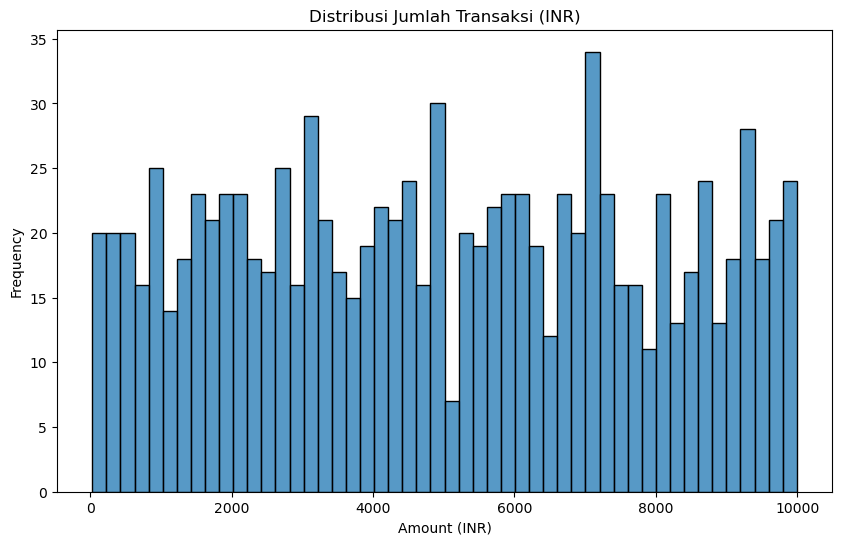

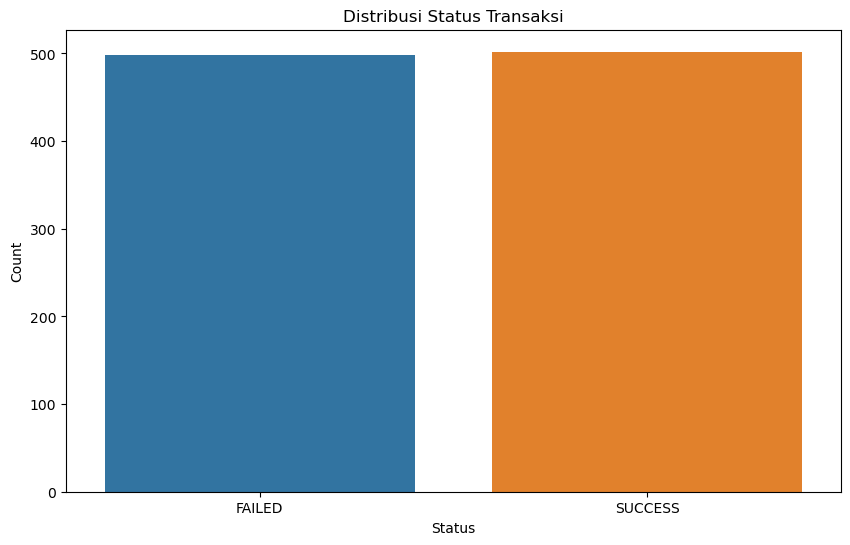

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
df = pd.read_csv('transactions.csv')

# Menampilkan beberapa baris pertama dataset
print(df.head())

# Statistik deskriptif
print(df.describe())

# Menampilkan informasi umum dataset
print(df.info())

# Visualisasi distribusi jumlah transaksi
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount (INR)'], bins=50)
plt.title('Distribusi Jumlah Transaksi (INR)')
plt.xlabel('Amount (INR)')
plt.ylabel('Frequency')
plt.show()

# Visualisasi status transaksi
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=df)
plt.title('Distribusi Status Transaksi')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

TAHAP 2

In [31]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Mengatasi missing values
df.dropna(inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
df['Sender UPI ID'] = label_encoder.fit_transform(df['Sender UPI ID'])
df['Receiver UPI ID'] = label_encoder.fit_transform(df['Receiver UPI ID'])
df['Status'] = label_encoder.fit_transform(df['Status'])

# Scaling numerical features
scaler = StandardScaler()
df['Amount (INR)'] = scaler.fit_transform(df[['Amount (INR)']])

# Membagi dataset menjadi fitur dan target
X = df.drop(columns=['Transaction ID', 'Timestamp', 'Sender Name', 'Receiver Name', 'Status'])
y = df['Status']

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TAHAP 3

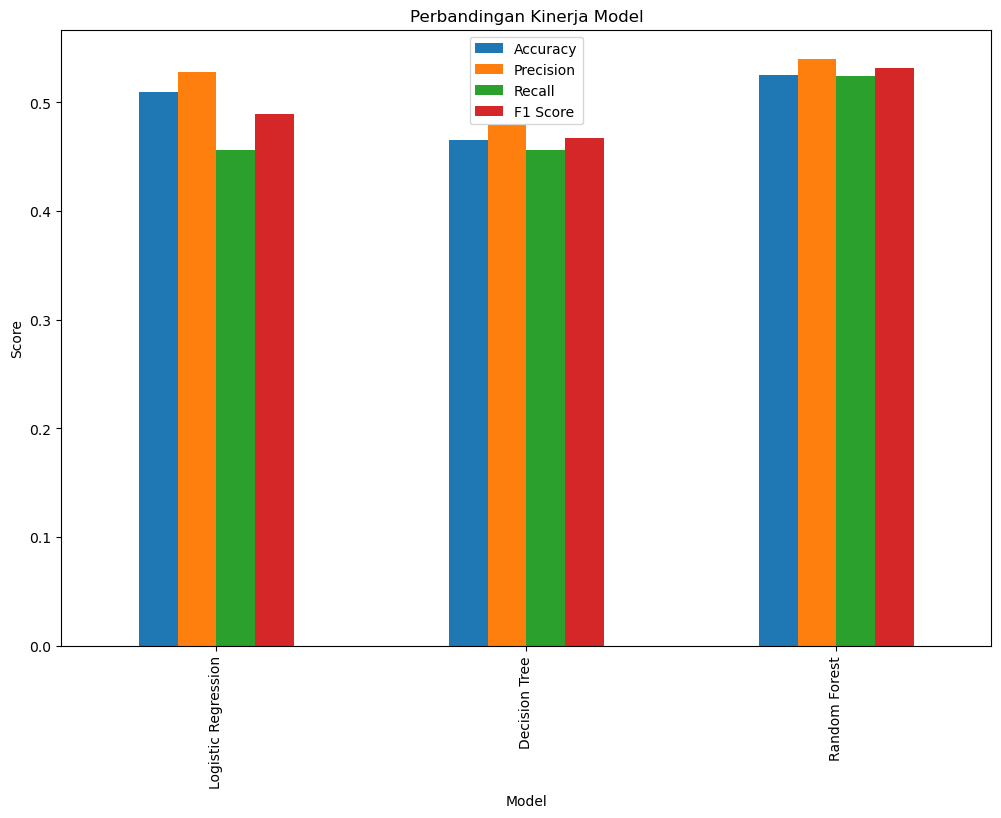

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluasi model
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

lr_metrics = evaluate_model(y_test, lr_pred)
dt_metrics = evaluate_model(y_test, dt_pred)
rf_metrics = evaluate_model(y_test, rf_pred)

# Visualisasi perbandingan kinerja model
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [lr_metrics[0], dt_metrics[0], rf_metrics[0]],
    'Precision': [lr_metrics[1], dt_metrics[1], rf_metrics[1]],
    'Recall': [lr_metrics[2], dt_metrics[2], rf_metrics[2]],
    'F1 Score': [lr_metrics[3], dt_metrics[3], rf_metrics[3]]
})

metrics_df.plot(x='Model', kind='bar', figsize=(12, 8))
plt.title('Perbandingan Kinerja Model')
plt.ylabel('Score')
plt.show()

TAHAP 6

In [34]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning untuk Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

# Evaluasi model terbaik
best_rf_pred = best_rf_model.predict(X_test)
best_rf_metrics = evaluate_model(y_test, best_rf_pred)

print(f"Best Random Forest F1 Score: {best_rf_metrics[3]}")

Best Random Forest F1 Score: 0.5226130653266331
